- CRIM:     Per capita crime rate by town
- ZN:       Proportion of residential land zoned for lots over 25,000 sq. ft
- INDUS:    Proportion of non-retail business acres per town
- CHAS:     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX:      Nitric oxide concentration (parts per 10 million)
- RM:       Average number of rooms per dwelling
- AGE:      Proportion of owner-occupied units built prior to 1940
- DIS:      Weighted distances to five Boston employment centers
- RAD:      Index of accessibility to radial highways
- TAX:      Full-value property tax rate per $10,000
- PTRATIO:  Pupil-teacher ratio by town
- B:        1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
- LSTAT:    Percentage of lower status of the population
- MEDV:     Median value of owner-occupied homes in $1000s

In [206]:
# 07-02-2024

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [117]:
df = pd.read_csv('HousingData.csv')

In [118]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [119]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [120]:
df.shape

(506, 14)

In [121]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

# Data Preprocessing

In [122]:
# Removing Null Values by replacing them with the mean

def removeNUllValues(columnName, dataSet):
    meanVal = dataSet[columnName].mean()
    dataSet[columnName].fillna(value=meanVal, inplace=True)

removeNUllValues('CRIM', df)
removeNUllValues('ZN', df)
removeNUllValues('INDUS', df)
removeNUllValues('CHAS', df)
removeNUllValues('AGE', df)
removeNUllValues('LSTAT', df)


In [123]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# Data Visualization

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


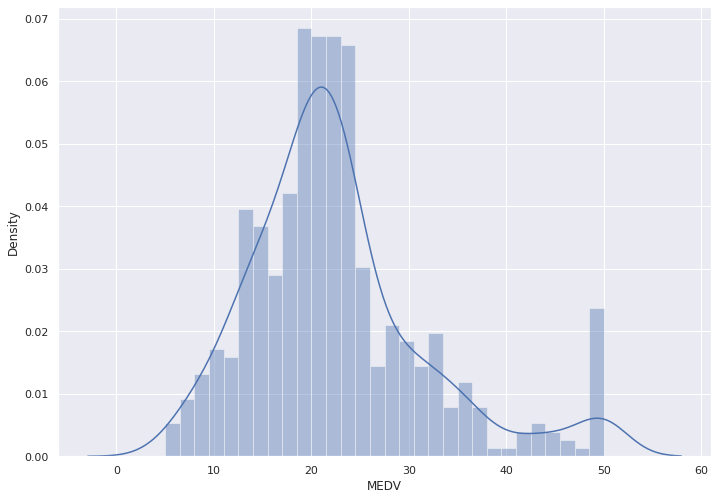

In [124]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

# Distributed Normally with few outliers

<AxesSubplot:>

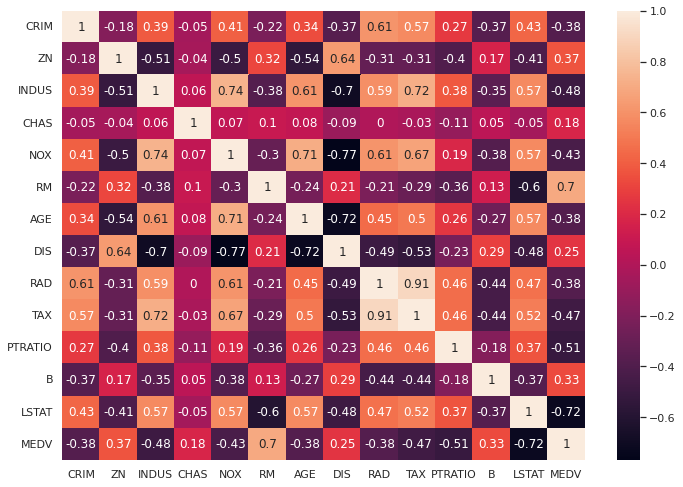

In [125]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

# Positive Correlation -> zn, chas, rm, dis, b
# Negative Correlation -> crim, indus, nox, age, rad, tax, ptratio, lstat

In [126]:
# def plotScatterPlot(columnNanme, targetedColumn, df):
#     sns.scatterplot(x=df[columnNanme], y=df[targetedColumn])

#     plt.xlabel(columnNanme)
#     plt.ylabel(targetedColumn)
#     plt.title('Scatter Plot of ' + columnNanme + ' vs ' + targetedColumn)

#     plt.show()

In [127]:
df2 = df[['RM', 'MEDV']]

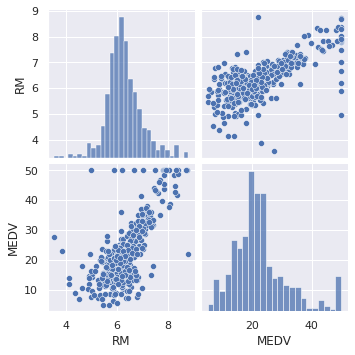

In [128]:
sns.pairplot(df2)
plt.show()

In [158]:
x = df2[['RM']]
y = df2['MEDV']

# Scaling the Data

In [159]:
scaler =  StandardScaler()

In [160]:
# x = scaler.fit_transform(x)

In [161]:
# Splitting the data into training set and testing set(40% is testing data and 70% is training)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101, shuffle=True)

In [162]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 1), (152, 1), (354,), (152,))

# Linear Regression

In [163]:
# Linear Regression
lm=LinearRegression()
lm.fit(X_train,y_train)

# y = β0 + β1⋅x1 + β2⋅x2 +…+ βn⋅xn

LinearRegression()

In [164]:
lm.intercept_

-33.05140687363652

In [165]:
lm.coef_

array([8.79753255])

# Predictions

In [189]:
y_pred = lm.predict(X_test)
# print(y_pred)

In [167]:
mean_absolute_error(y_test, y_pred)

4.75614486976047

In [168]:
mean_squared_error(y_test, y_pred)

48.11240589160621

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


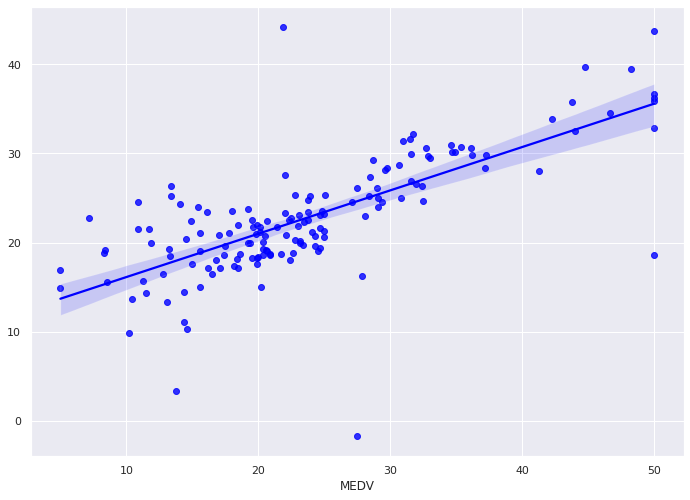

In [169]:
sns.regplot(y_test, y_pred, color='blue')
plt.show()

# Manually Calculating Linear Regression

In [170]:
# y = mx + b
# targeted value = MEDV
# x value = RM

Calculating "m"

* m = summ(xi - x)(yi - y) / summ(xi - x)^2    (x = mean value)

In [171]:
mean_x = X_train.mean()
print("Mena RM:" , mean_x)
mean_y = y_train.mean()
print("Mena MEDV:" , mean_y)

Mena RM: RM    6.254963
dtype: float64
Mena MEDV: 21.97683615819209


In [172]:
df['xi-x'] = X_train - mean_x

df['yi-y'] = y_train - mean_y

In [174]:
summ_xi_x = df['xi-x'].sum()
print("Summ xi-x: ", summ_xi_x)
summ_yi_y = df['yi-y'].sum()
print("Summ yi-y: ", summ_yi_y)

Summ xi-x:  -9.681144774731365e-14
Summ yi-y:  3.410605131648481e-13


In [178]:
df['(xi-x)(yi-y)'] = df['xi-x'] * df['yi-y']

In [180]:
summ_xi_x_yi_y = df['(xi-x)(yi-y)'].sum()


In [181]:
df['xi_x_sq'] = df['xi-x'] * df['xi-x']

In [182]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,xi-x,yi-y,(xi-x)(yi-y),xi_x_sq
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0,0.320037,2.023164,0.647487,0.102424
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6,0.166037,-0.376836,-0.062569,0.027568
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7,NaN,NaN,NaN,NaN
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4,0.743037,11.423164,8.487830,0.552104
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432,36.2,NaN,NaN,NaN,NaN


In [183]:
summ_xi_x_sq = df['xi_x_sq'].sum()

In [184]:
# m value
m = summ_xi_x_yi_y / summ_xi_x_sq
print(m)

8.797532550768642


In [186]:
# b value

b = mean_y - (m * mean_x)
print(b)

RM   -33.051407
dtype: float64


In [204]:
# therfore the line y = mx + b
# y_pred = 8.79*x - 33.05
y_pred2 = m*X_test + b

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


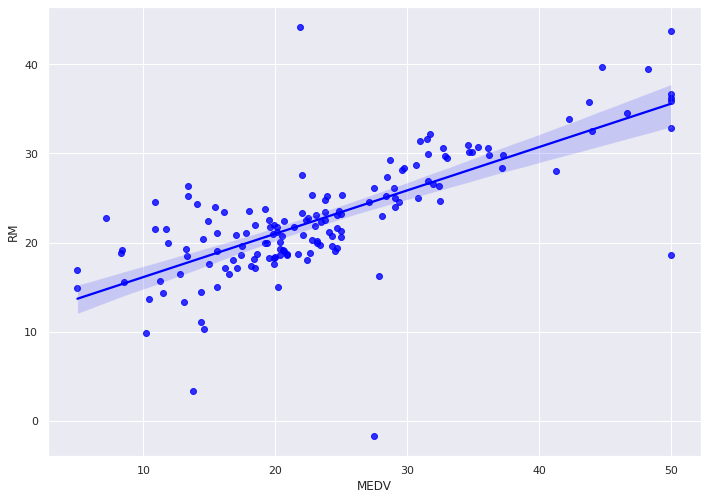

In [211]:
sns.regplot(y_test, y_pred2, color='blue')
plt.show()

In [210]:
print(mean_absolute_error(y_test, y_pred2))
print(mean_squared_error(y_test, y_pred2))
print(r2_score(y_test, y_pred2))

4.756144869760469
48.1124058916062
0.5152898496246172
